In [5]:
# Get youtube transcript

from youtube_transcript_api import YouTubeTranscriptApi
import pandas as pd


def get_youtube_video_transcript_dataframe(youtube_url):
    try:
        # Extract video ID from the URL
        video_id = youtube_url.split("v=")[-1]

        # Get the transcript
        transcript = YouTubeTranscriptApi.get_transcript(video_id)

        # Create an empty list to store the transcript data
        transcript_data = []

        # Loop through each transcript item and extract timestamp and text
        for item in transcript:
            start_time = item["start"]
            end_time = item["start"] + item["duration"]
            text = item["text"]
            transcript_data.append({"Start": start_time, "End": end_time, "Text": text})

        # Convert the list to a pandas DataFrame
        df = pd.DataFrame(transcript_data)

        return df

    except Exception as e:
        print("Error:", e)
        return None

# Replace the following with the YouTube video URL of your choice
youtube_url = "https://www.youtube.com/watch?v=VyFk2sdw230&ab_channel=BiggerPockets"
transcript_df = get_youtube_video_transcript_dataframe(youtube_url)

if transcript_df is not None:
    print(transcript_df.head())
else:
    print("Failed to get the transcript.")

   Start     End                                      Text
0  0.000   5.339  welcome to mortgage Mondays Today's Show
1  2.280   6.720    we are going to break down an FHA loan
2  5.339   8.280     pretty much everything that you could
3  6.720   9.720      possibly need to know but if you now
4  8.280  10.980   show up to an appointment with the loan


C:\Users\drago\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


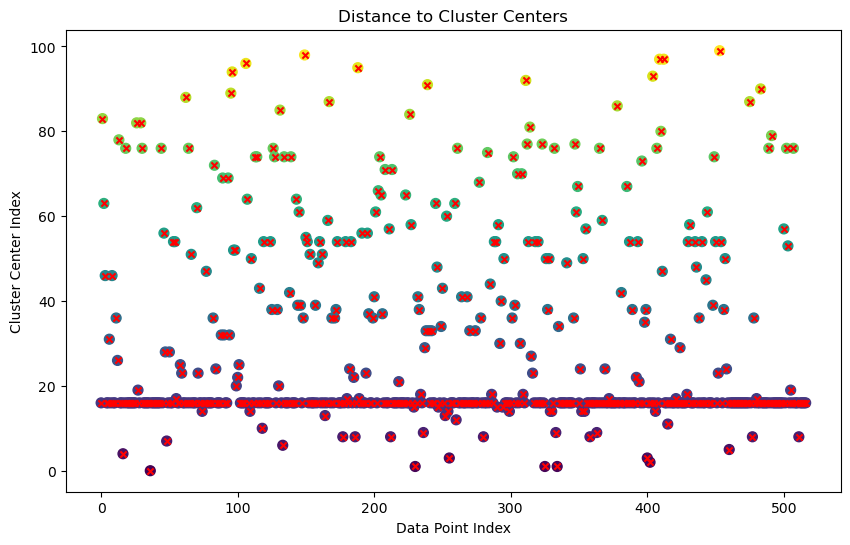

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Sample text data in a pandas DataFrame
data = transcript_df

# Tokenize and preprocess the documents
data['sentences'] = data['Text'].apply(nltk.sent_tokenize)
sentences = [sent for sublist in data['sentences'] for sent in sublist]

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)

# Perform K-means clustering
num_clusters = 100  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)

# Find the closest cluster centers for each point
closest_cluster_centers, _ = pairwise_distances_argmin_min(X, kmeans.cluster_centers_)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(X.toarray())), closest_cluster_centers, c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(range(len(X.toarray())), kmeans.labels_, marker='x', color='red', s=20)
plt.xlabel('Data Point Index')
plt.ylabel('Cluster Center Index')
plt.title('Distance to Cluster Centers')
plt.show()


In [12]:
import pandas as pd
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Sample text data in a pandas DataFrame
data = transcript_df

# Tokenize and preprocess the documents
nltk.download("punkt")
data['sentences'] = data['Text'].apply(nltk.sent_tokenize)
sentences = [sent for sublist in data['sentences'] for sent in sublist]

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)

# Perform K-means clustering
num_clusters = 50  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)

# Find cluster centroids (representative sentences)
cluster_centers = kmeans.cluster_centers_
cluster_distances = np.linalg.norm(X - cluster_centers[kmeans.labels_], axis=1)
cluster_summary_indices = np.argpartition(cluster_distances, 10)[:10]

# Print the summary
print("Generated Summary:")
for idx in cluster_summary_indices:
    print(sentences[idx])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\drago\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Generated Summary:
another one and when you're using the
greater scale than what it's hurting you
so sometimes you have to give something
refinance to get it off and that's
there this is not something that you can
should be using I'd rather if you had
up to get something and if it's an
because then you can still go refinance
into a six and a half percent
it as the three and a half percent down


In [3]:
# Example

import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Sample text data
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Tokenize and preprocess the documents
nltk.download("punkt")
sentences = [nltk.sent_tokenize(doc) for doc in documents]
sentences = [sent for sublist in sentences for sent in sublist]

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)

# Perform K-means clustering
num_clusters = 2  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)

# Find cluster centroids (representative sentences)
cluster_centers = kmeans.cluster_centers_
cluster_distances = np.linalg.norm(X - cluster_centers[kmeans.labels_], axis=1)
cluster_summary_indices = np.argpartition(cluster_distances, 2)[:2]

# Print the summary
print("Generated Summary:")
for idx in cluster_summary_indices:
    print(sentences[idx])


Generated Summary:
And this is the third one.
This is the first document.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\drago\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


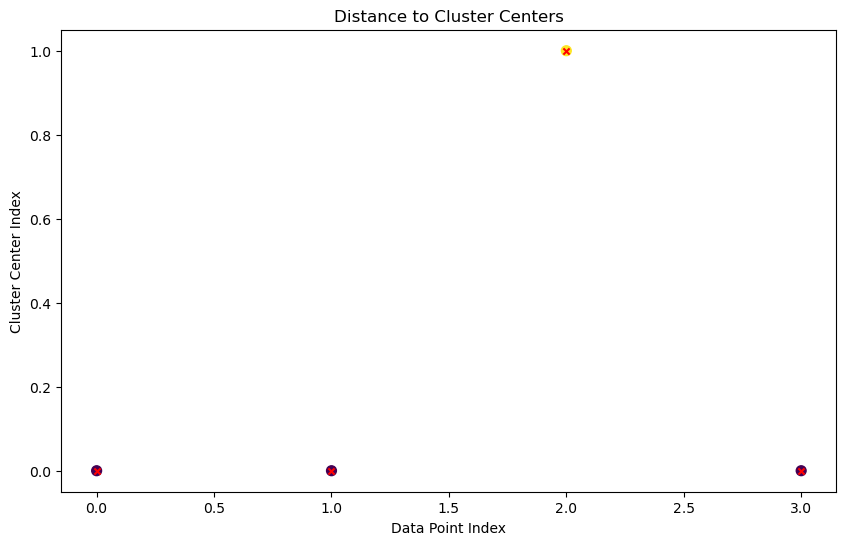

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

# Fit K-means model
kmeans.fit(X)

# Find the closest cluster centers for each point
closest_cluster_centers, _ = pairwise_distances_argmin_min(X, kmeans.cluster_centers_)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(X.toarray())), closest_cluster_centers, c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(range(len(X.toarray())), kmeans.labels_, marker='x', color='red', s=20)
plt.xlabel('Data Point Index')
plt.ylabel('Cluster Center Index')
plt.title('Distance to Cluster Centers')
plt.show()
